# PROJECT: Predicting House Prices in Bangalore
Dataset source : https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] =(20,10)

# Data Load: Loading the data of home prices into a dataframe

In [2]:
df = pd.read_csv('datasets_20710_26737_Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

# Data Cleaning: Handling of NA values

In [7]:
def change_to_numeric(x):
    if x == 'Super built-up  Area':
        return 0
    elif x == 'Plot  Area':
        return 1
    elif x == 'Built-up  Area':
        return 2
    else:
        return 3

df['area_type_numeric'] = df['area_type'].apply(change_to_numeric)

In [8]:
df2 = df[['area_type_numeric', 'price']]
df2.corr()

,area_type_numeric,price
area_type_numeric,1.000000,0.092563
price,0.092563,1.000000


In [9]:
df1 = df.drop('area_type', axis = 'columns')

In [10]:
df1.balcony = df1.balcony.fillna(df1.balcony.median())

In [11]:
df1.balcony.isnull().sum()

0

In [12]:
df_temp = df1[['balcony', 'price']]
df_temp.corr()

,balcony,price
balcony,1.000000,0.124951
price,0.124951,1.000000


In [13]:
def ready(x):
    if x == 'Ready To Move':
        return 1
    else:
        return 0
df1['availability'] = df1['availability'].apply(ready)

In [14]:
df_temp = df1[['availability', 'price']]
df_temp.corr()

,availability,price
availability,1.000000,0.034483
price,0.034483,1.000000


In [15]:
df2 = df1.drop(['society' , 'balcony', 'availability'] , axis = 'columns')

In [16]:
df2.head()

,location,size,total_sqft,bath,price,area_type_numeric
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,1
2,Uttarahalli,3 BHK,1440,2.0,62.00,2
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,0
4,Kothanur,2 BHK,1200,2.0,51.00,0


In [17]:
df2.isnull().sum()

location              1
size                 16
total_sqft            0
bath                 73
price                 0
area_type_numeric     0
dtype: int64

In [18]:
df2.describe()

,bath,price,area_type_numeric
count,13247.000000,13320.000000,13320.000000
mean,2.692610,112.565627,0.534685
std,1.341458,148.971674,0.806907
min,1.000000,8.000000,0.000000
25%,2.000000,50.000000,0.000000
50%,2.000000,72.000000,0.000000
75%,3.000000,120.000000,1.000000
max,40.000000,3600.000000,3.000000


In [19]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [20]:
df2['size'].value_counts().head()

2 BHK        5199
3 BHK        4310
4 Bedroom     826
4 BHK         591
3 Bedroom     547
Name: size, dtype: int64

In [21]:
df2['size'] = df2['size'].fillna('2 BHK')

# Feature Engineering
**Adding new feature(integer) for bhk (Bedrooms Hall Kitchen)**

In [22]:
df2['BHK'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))

In [23]:
df_temp = df2[['BHK', 'price']]
df_temp.corr()

,BHK,price
BHK,1.000000,0.398074
price,0.398074,1.000000


In [24]:
df2['bath'] = df2['bath'].fillna(df2.bath.median())

In [25]:
df2.head()

,location,size,total_sqft,bath,price,area_type_numeric,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,0,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,1,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,2,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,0,3
4,Kothanur,2 BHK,1200,2.0,51.00,0,2


In [26]:
df2['location'].value_counts()

Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
                            ... 
Handenahalli                   1
Whitefield ECC Road            1
Lakshmipura Vidyaanyapura      1
Medi Agrahara                  1
HAL Layout                     1
Name: location, Length: 1305, dtype: int64

In [27]:
df2['location'] = df2['location'].fillna('Whitefield')

In [28]:
df2.isnull().sum()

location             0
size                 0
total_sqft           0
bath                 0
price                0
area_type_numeric    0
BHK                  0
dtype: int64

In [29]:
df2.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [30]:
df2[df2.BHK>20]

,location,size,total_sqft,bath,price,area_type_numeric,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,1,43


In [31]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [32]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [33]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,area_type_numeric,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,0,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,2,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,2,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,0,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,0,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,0,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,0,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,0,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,0,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,0,2


**Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. We are going to just drop such corner cases to keep things simple.**

In [34]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [35]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,area_type_numeric,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,0,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,1,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,2,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,0,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,0,2


In [36]:
df3['bath'] = df3['bath'].apply(lambda x: int(x))

In [37]:
df_temp = df3[['BHK', 'price']]
df_temp.corr()

,BHK,price
BHK,1.000000,0.398074
price,0.398074,1.000000


In [38]:
df4 = df3.copy()
df4['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df4

,location,size,total_sqft,bath,price,area_type_numeric,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,1,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,2,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,0,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4,231.00,2,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5,400.00,0,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4,488.00,0,4,10407.336319


In [39]:
df4['location'].agg('count')

13320

In [40]:
len(df4.location)

13320

In [41]:
df4.location = df4.location.apply(lambda x : x.strip())
location_stats = df4.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1294, dtype: int64

In [42]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield            542
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
Thanisandra           237
                     ... 
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1294, dtype: int64

In [43]:
len(location_stats[location_stats<=10])

1053

# Dimensionality Reduction
**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns.**

In [44]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [45]:
df4.location = df4.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [46]:
len(df4.location.unique())

242

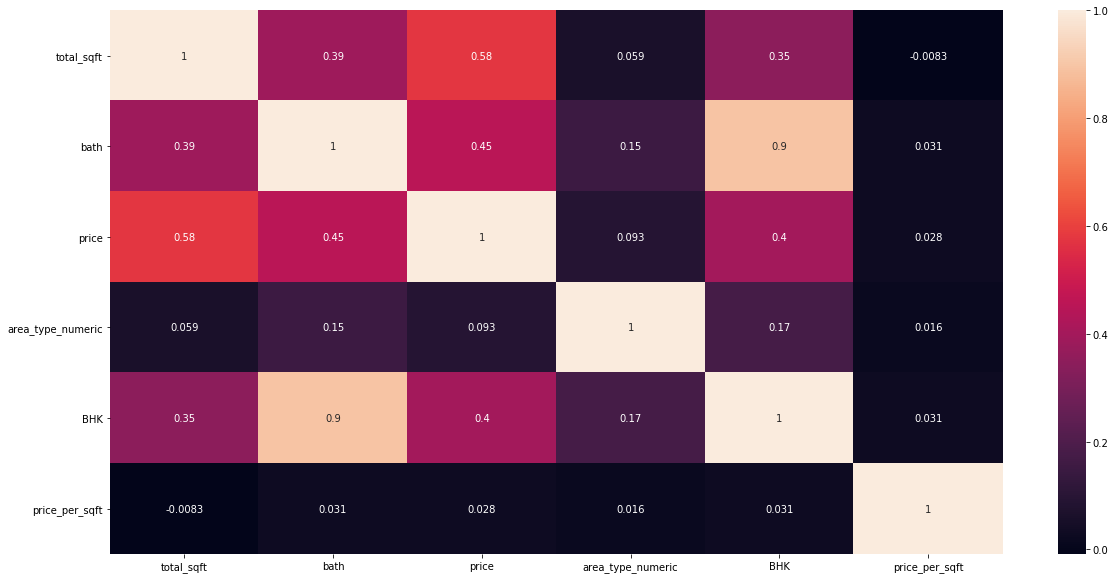

In [47]:
sns.heatmap(df4.corr(), annot = True)

In [48]:
df4.head(10)

,location,size,total_sqft,bath,price,area_type_numeric,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,1,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,2,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,0,2,4250.000000
5,Whitefield,2 BHK,1170.0,2,38.00,0,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4,204.00,0,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4,600.00,0,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3,63.25,0,3,4828.244275
9,other,6 Bedroom,1020.0,6,370.00,1,6,36274.509804


# Outliers detection and removal

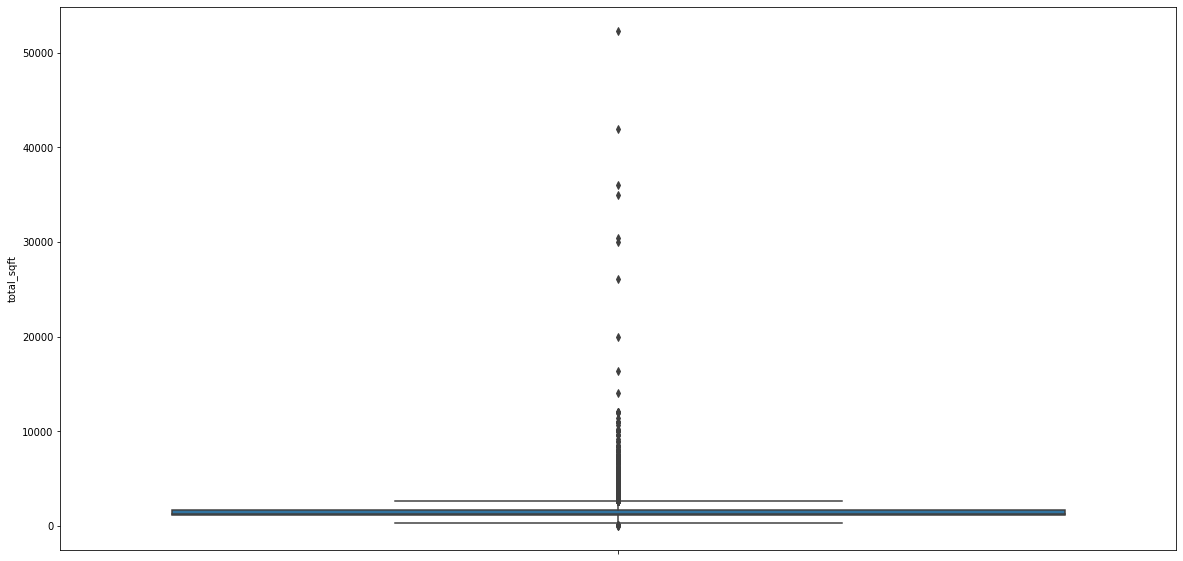

In [49]:
sns.boxplot('total_sqft', data = df4, orient = 'vertical')

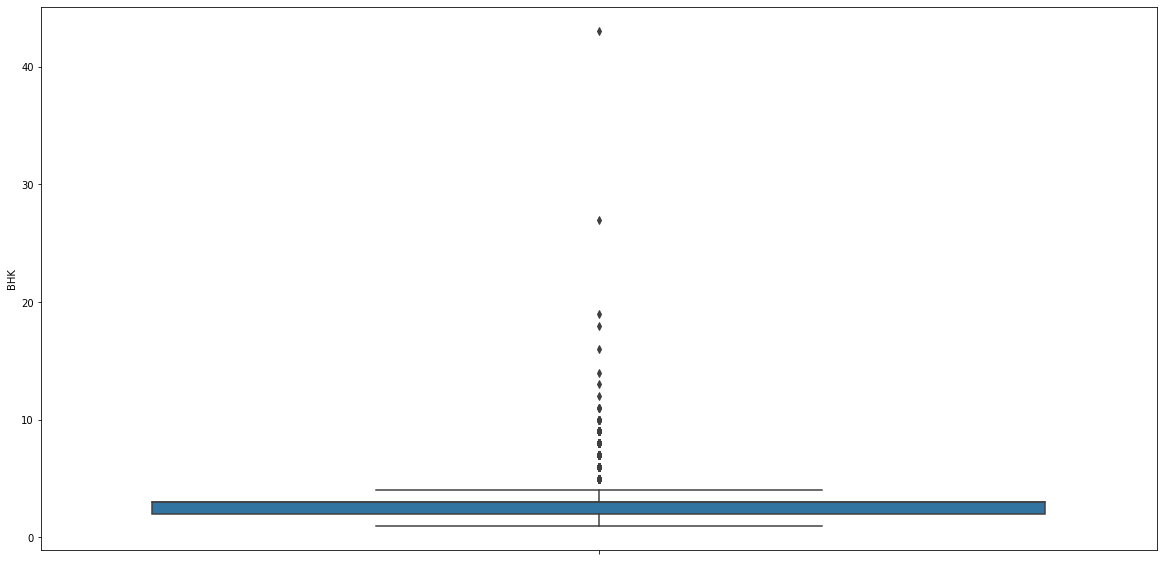

In [50]:
sns.boxplot('BHK', data = df4, orient = 'vertical')

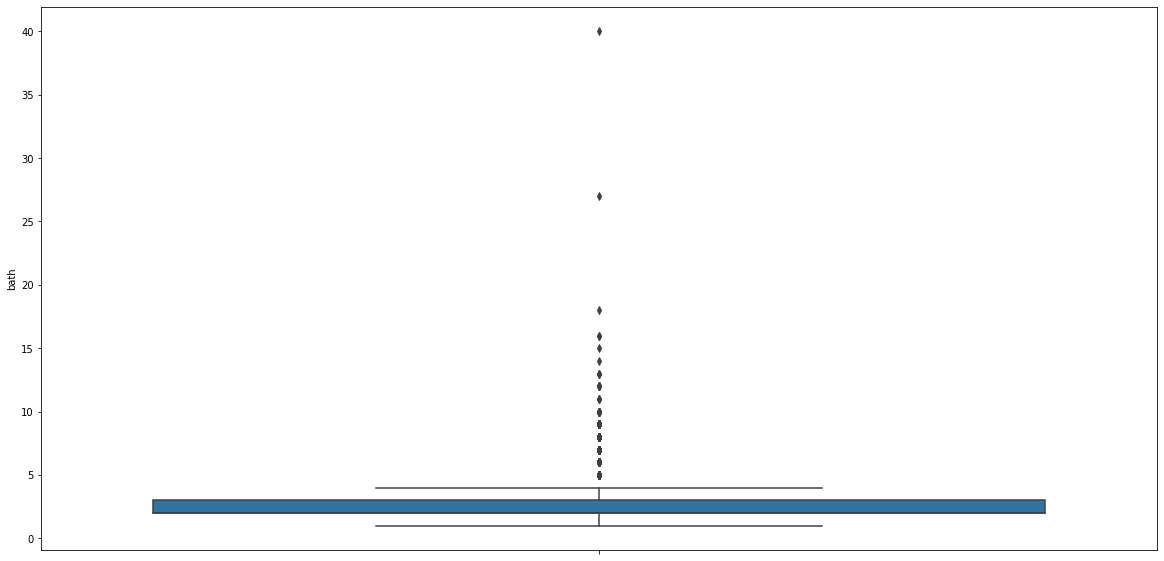

In [51]:
sns.boxplot('bath', data = df4, orient = 'vertical')

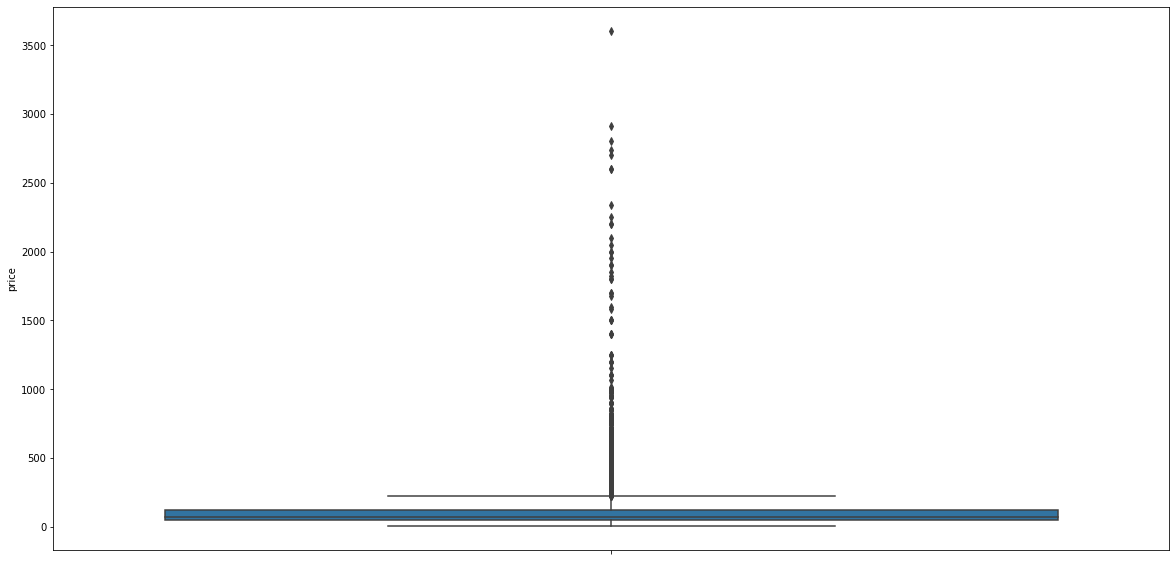

In [52]:
sns.boxplot('price', data = df4, orient = 'vertical')

In [1]:
max_threshold = df4[["bath","BHK","total_sqft", "price", "price_per_sqft"]].quantile(0.95)
max_threshold

NameError: name 'df4' is not defined

In [54]:
df4 = df4.drop(df4[df4['BHK'] > 5].index)
df4 = df4.drop(df4[df4['bath'] > 5].index)
df4 = df4.drop(df4[df4['total_sqft'] > 3250.0].index)
df4 = df4.drop(df4[df4['price'] > 324.0].index)
df4 = df4.drop(df4[df4['price_per_sqft'] > 15293.303348].index)

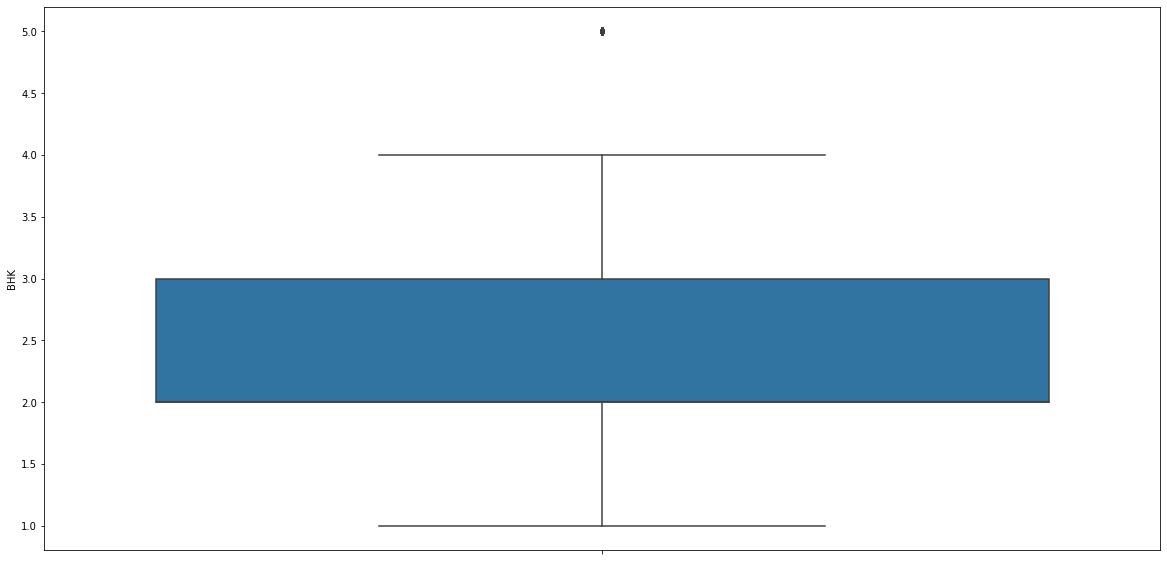

In [55]:
sns.boxplot('BHK', data = df4, orient = 'vertical')

# Outlier Removal Using Basic Real Estate Logic
**Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If we have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft.**

In [56]:
#let say we assume that a room ccan be of 300sqft
df4[df4.total_sqft/df4.BHK<300].head(10)

,location,size,total_sqft,bath,price,area_type_numeric,BHK,price_per_sqft
78,Kaval Byrasandra,2 BHK,460.0,1,22.0,2,2,4782.608696
119,Hennur Road,2 Bedroom,276.0,3,23.0,1,2,8333.333333
176,Kumaraswami Layout,5 Bedroom,600.0,3,85.0,1,5,14166.666667
258,other,5 Bedroom,1200.0,5,170.0,1,5,14166.666667
315,other,5 Bedroom,1200.0,5,180.0,1,5,15000.000000
409,Sultan Palaya,2 Bedroom,550.0,1,62.0,1,2,11272.727273
482,Kenchenahalli,5 Bedroom,500.0,3,65.0,1,5,13000.000000
491,Banjara Layout,3 Bedroom,600.0,3,58.0,1,3,9666.666667
513,8th Phase JP Nagar,4 Bedroom,660.0,4,90.0,1,4,13636.363636
679,other,5 Bedroom,1200.0,5,100.0,1,5,8333.333333


In [57]:
df5 = df4[~(df4.total_sqft/df4.BHK<300)]

In [58]:
df5['price_per_sqft'].describe()

count    11303.000000
mean      5576.658994
std       2114.608104
min        500.000000
25%       4135.179721
50%       5133.047210
75%       6491.605694
max      15090.909091
Name: price_per_sqft, dtype: float64

# Outlier Removal Using Standard Deviation and Mean

In [59]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(8413, 8)

In [60]:
df5.shape

(11342, 8)

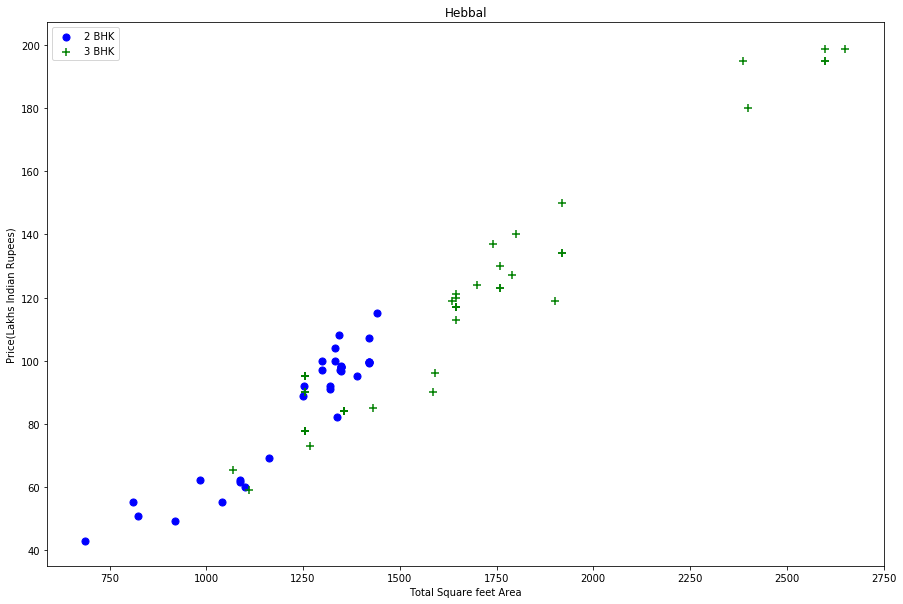

In [61]:
def plot_scatter_chart(df , location):
    bhk2 = df[(df.location == location) & (df.BHK==2)]
    bhk3 = df[(df.location == location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15 , 10)
    plt.scatter(bhk2.total_sqft , bhk2.price , color = 'blue' , label = '2 BHK' , s = 50)
    plt.scatter(bhk3.total_sqft , bhk3.price , marker = '+' , color = 'green' , label = '3 BHK' , s = 50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price(Lakhs Indian Rupees)')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6 , 'Hebbal')  

In [62]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices , axis = 'index')   

df7 = remove_bhk_outliers(df6)
df7.shape

(6088, 8)

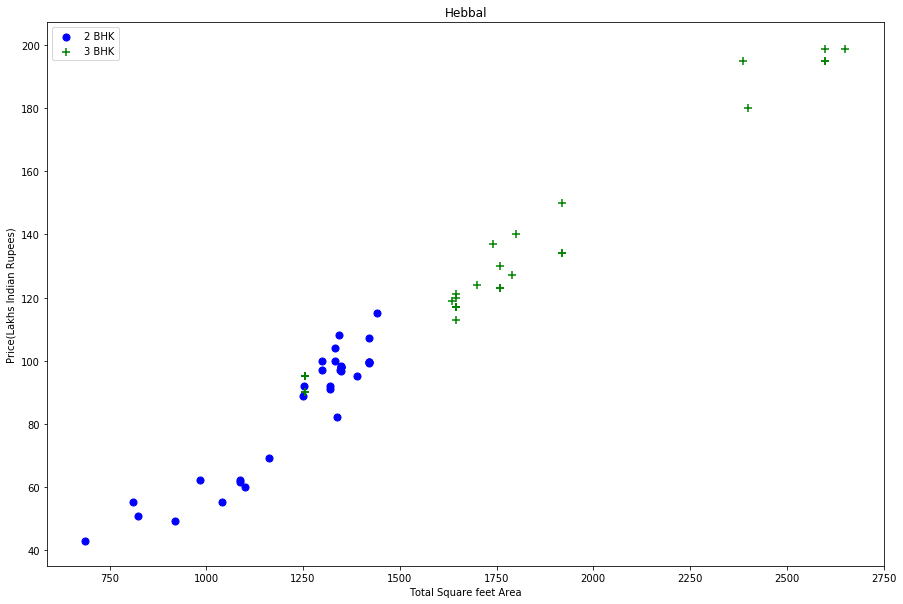

In [63]:
plot_scatter_chart(df7 , 'Hebbal')

Text(0, 0.5, 'Count')

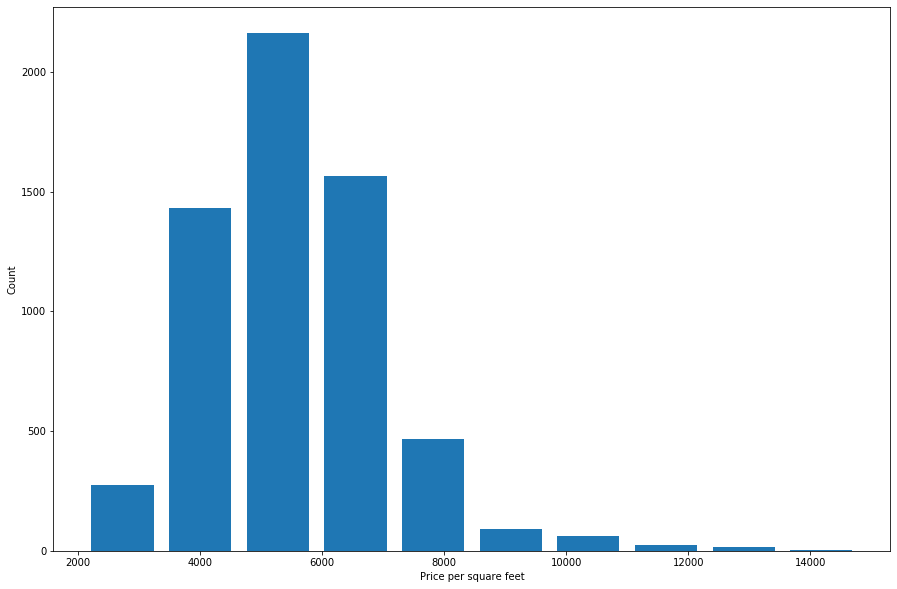

In [64]:
plt.hist(df7.price_per_sqft , rwidth = 0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

In [65]:
df7.bath.unique()

array([3, 2, 4, 5, 1], dtype=int64)

In [66]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,area_type_numeric,BHK,price_per_sqft


Text(0, 0.5, 'Count')

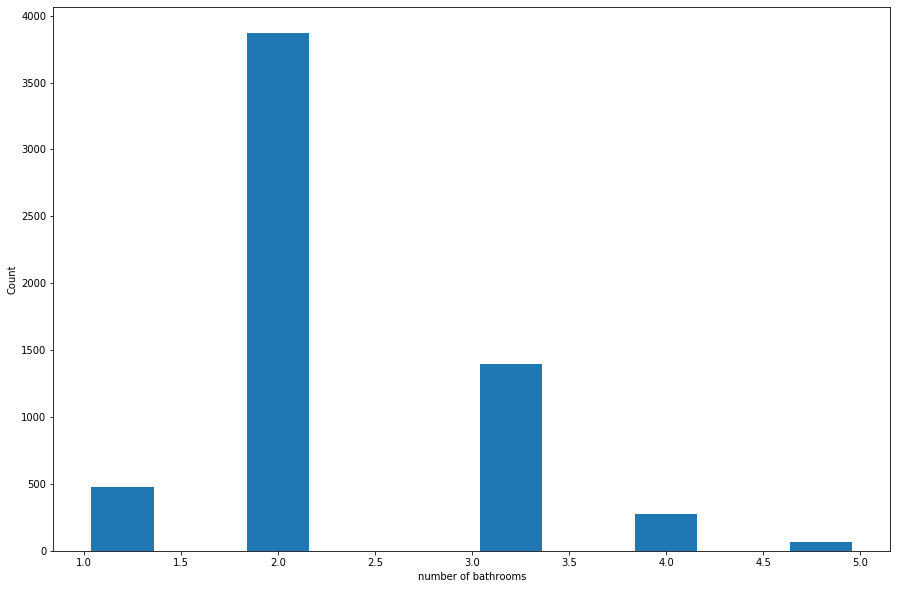

In [67]:
plt.hist(df7.bath , rwidth = 0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('Count')

In [68]:
df8 = df7[(df7.bath<df7.BHK+2)]
df8.shape

(6077, 8)

In [69]:
df9 = df8.drop(['size' , 'price_per_sqft', 'area_type_numeric'] , axis = 'columns')
df9.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,1630.0,3,194.0,3
1,1st Block Jayanagar,1875.0,2,235.0,3
2,1st Block Jayanagar,1200.0,2,130.0,3
3,1st Block Jayanagar,1235.0,2,148.0,2
4,1st Phase JP Nagar,2825.0,4,250.0,4


# Using One Hot Encoding For Location

In [70]:
dummies = pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df10 = pd.concat([df9 , dummies.drop('other' , axis = 'columns')] , axis = 'columns')
df10.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1630.0,3,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1875.0,2,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,2,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1235.0,2,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,2825.0,4,250.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df11 = df10.drop(['location'] , axis = 'columns')

# Model Building

In [73]:
x = df11.drop('price' , axis = 'columns')

In [74]:
y = df11.price

# Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [76]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [77]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
#import xgboost as xgb 
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(x , y):
    algos = {
        'LinearRegression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True , False],
                'fit_intercept': [True , False],
                 'copy_X' : [True , False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 10, 50, 200, 500],
                'selection' : ['random' , 'cyclic']
            } 
        },
        'Ridge' : {
            'model' : Ridge(), 
            'params' : {
                'alpha' : [1, 10, 50, 200, 500],
                'fit_intercept' : [True , False],
                'normalize' : [True , False],
            }
        },
        'descision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' :{
                'criterion' : ['mse' , 'friedman_mse'],
                'splitter' : ['best' , 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'] , config['params'] , cv = cv , return_train_score = False)
        gs.fit(x , y)
        scores.append({
            'model' : algo_name , 
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])        

In [78]:
find_best_model_using_gridsearchcv(X , y) 

,model,best_score,best_params
0,LinearRegression,0.825286,"{'copy_X': True, 'fit_intercept': True, 'norma..."
1,lasso,0.837385,"{'alpha': 1, 'selection': 'random'}"
2,Ridge,0.904610,"{'alpha': 1, 'fit_intercept': True, 'normalize..."
3,descision_tree,0.822243,"{'criterion': 'mse', 'splitter': 'best'}"


In [79]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 10)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_x = StandardScaler()
s_y = StandardScaler()
X_train_scaled = s_x.fit_transform(X_train)
X_test_scaled = s_x.transform(X_test)

# Model Training 

In [81]:
from sklearn.linear_model import Ridge
model = Ridge(alpha= 1, fit_intercept = True, normalize = False)
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled , y_test)

0.9073873331294475

# Evaluation

In [82]:
from sklearn.metrics import mean_squared_error,r2_score
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
acc = mean_squared_error(y_pred,y_test)
rscore = r2_score(y_pred,y_test)

In [83]:
rscore

0.8944523313771668

In [84]:
def rmse(y_pred, y_test):
    return np.sqrt(mean_squared_error(y_pred,y_test))
rmse(y_pred,y_test)

12.721318953730718

In [85]:
model.score(X_train_scaled , y_train)

0.9179028189206632

In [86]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 0)
cross_val_score(Ridge(alpha= 1, fit_intercept = True, normalize = False, tol = 0.0001) , X , y , cv=cv).mean()

0.9038154470831113

In [87]:
def predict_price(location , sqft ,bath, bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    i = np.zeros(len(x.columns))
    i[0] = sqft
    i[1] = bhk
    i[2] = bhk
    if loc_index >= 0:
        i[loc_index] = 1
    i_scaled = s_x.transform([i])[0]
        
    return model.predict([i_scaled])[0] 

# Predictions(in Lakhs)

In [88]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

91.17773296276545

In [89]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

90.66773221874539

In [90]:
predict_price('Indira Nagar',1000, 2, 2)

106.38138349619986

In [91]:
predict_price('Indira Nagar',1000, 3, 3)

105.87138275217981